In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import seaborn as sns
import pandas as pd

# Load dataset Titanic dari seaborn
df = sns.load_dataset('titanic')

# Tampilkan 5 baris pertama
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
df = df.copy()  # Membuat salinan agar tidak ada warning

# Mengisi age dengan median
df['age'] = df['age'].fillna(df['age'].median())

# Mengisi embarked dengan mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Mengisi embark_town dengan mode
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Menghapus kolom deck jika ada
if 'deck' in df.columns:
    df = df.drop(columns=['deck'])


In [13]:
import pandas as pd

# Cek missing values
print(df.isnull().sum())


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [14]:
df.describe(include='all')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891,891,891,891,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646,491,537,537,646,549,537
mean,0.383838,2.308642,NaN,29.361582,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,13.019697,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


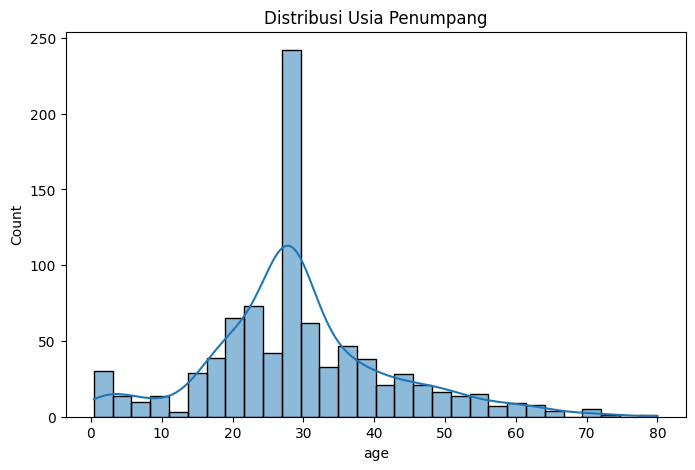

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribusi Usia Penumpang")
plt.show()


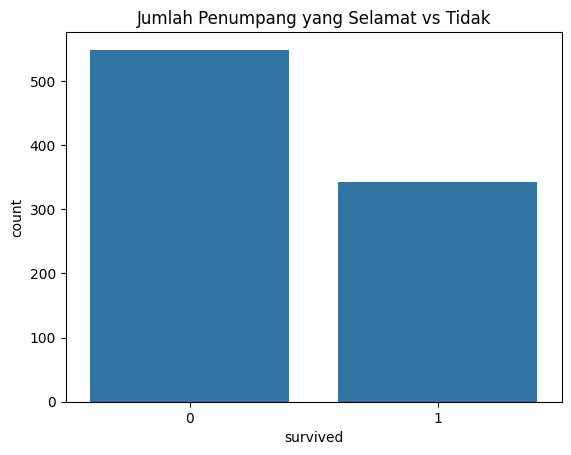

In [16]:
sns.countplot(x='survived', data=df)
plt.title("Jumlah Penumpang yang Selamat vs Tidak")
plt.show()


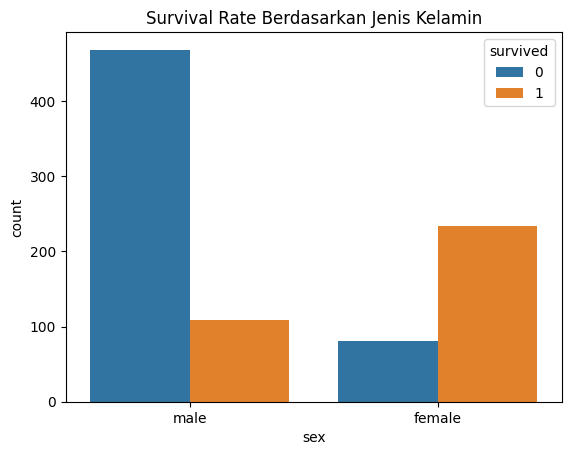

In [17]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival Rate Berdasarkan Jenis Kelamin")
plt.show()


In [19]:
df.dtypes


survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object

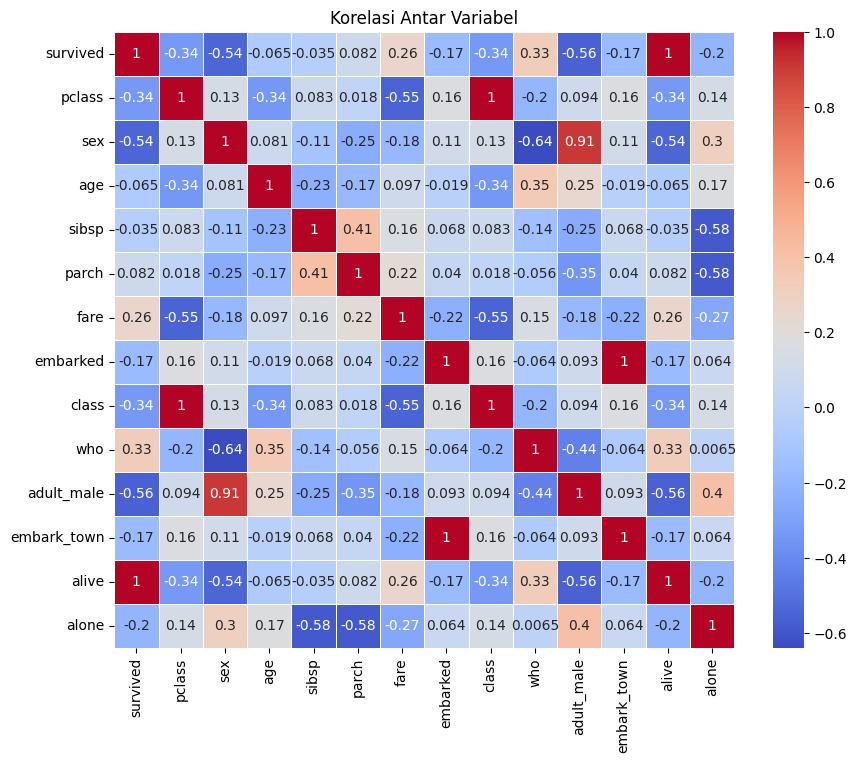

In [20]:
# Mengubah kolom kategorikal ke numerik
df_encoded = df.copy()

# Gunakan encoding otomatis jika ada data kategorikal
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Cek korelasi lagi
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasi Antar Variabel")
plt.show()


C:\Users\Robi\AppData\Local\Temp\ipykernel_10420\1824511514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['survived'], palette='coolwarm')


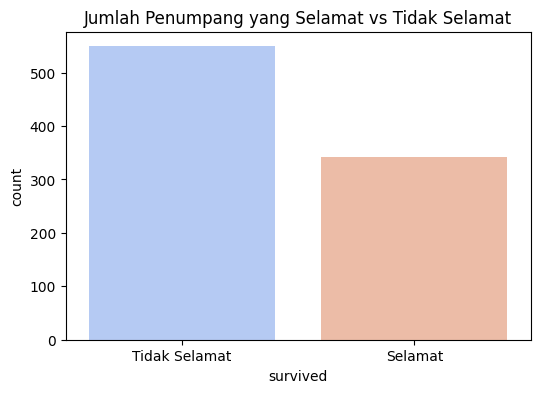

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['survived'], palette='coolwarm')
plt.title("Jumlah Penumpang yang Selamat vs Tidak Selamat")
plt.xticks([0,1], ['Tidak Selamat', 'Selamat'])
plt.show()


C:\Users\Robi\AppData\Local\Temp\ipykernel_10420\2958344992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sex", y="survived", data=df, palette='coolwarm')


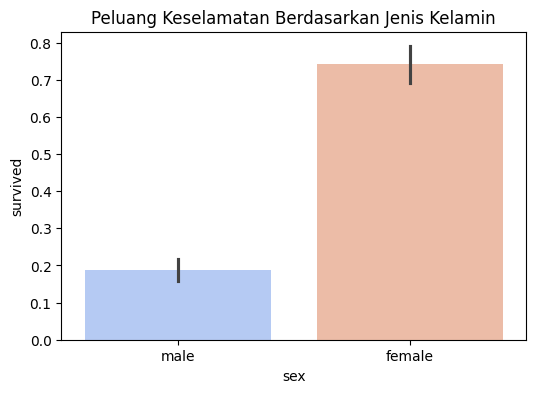

In [23]:
plt.figure(figsize=(6, 4))
sns.barplot(x="sex", y="survived", data=df, palette='coolwarm')
plt.title("Peluang Keselamatan Berdasarkan Jenis Kelamin")
plt.show()


In [24]:
from sklearn.preprocessing import LabelEncoder

# Ubah gender jadi angka (male = 0, female = 1)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Ubah embarkasi jadi angka (C = 0, Q = 1, S = 2)
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)  # Isi yang kosong dengan mode (paling sering muncul)

# Cek apakah masih ada NaN setelah perubahan
print(df.isnull().sum())


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


C:\Users\Robi\AppData\Local\Temp\ipykernel_10420\673528085.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)  # Isi yang kosong dengan mode (paling sering muncul)


In [25]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[features]  # Data yang digunakan untuk prediksi
y = df['survived']  # Target (label: selamat atau tidak)


In [26]:
from sklearn.model_selection import train_test_split

# Membagi data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek jumlah data di setiap set
print(f"Training set: {X_train.shape[0]} data")
print(f"Testing set: {X_test.shape[0]} data")


Training set: 712 data
Testing set: 179 data


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Membuat model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data training
model.fit(X_train, y_train)

# Memprediksi data testing
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.2%}")


Akurasi model: 81.56%


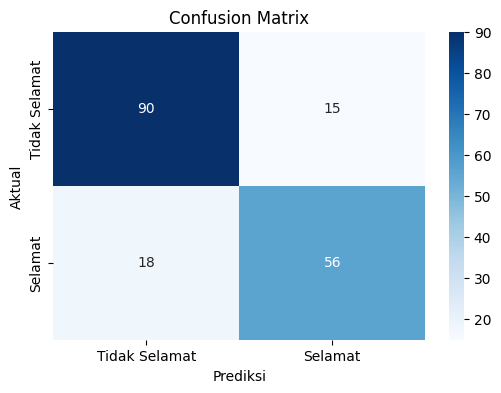

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Tidak Selamat", "Selamat"], yticklabels=["Tidak Selamat", "Selamat"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

# Menampilkan Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))
